<a href="https://colab.research.google.com/github/othyTim/Data-for-ML/blob/main/ML_Analysis_for_Customer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modeling Data
Timothy Lingeveldt

###Imports

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',100)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(transform_output='pandas')


In [26]:
def eval_regression(true, pred, name='Model'):

    """Evaluates true and predicted values from a regression model.
    Outputs a dataframe of metrics"""

    scores = pd.DataFrame()
    scores['Model Name'] = [name]
    scores['RMSE'] = [np.sqrt(mean_squared_error(true, pred))]
    scores['MAE'] = [mean_absolute_error(true, pred)]
    scores['R2'] = [r2_score(true, pred)]
    scores.set_index('Model Name', inplace=True)

    return scores

def eval_classification(true, pred, name='Model'):

    """shows classification_report and confusion matrix
    for classification model predictions.  Outputs a dataframe of metrics"""

    print(name, '\n')
    print(classification_report(true, pred))
    ConfusionMatrixDisplay.from_predictions(true, pred)
    plt.show()

    scores = pd.DataFrame()
    scores['Model Name'] = [name]
    scores['Precision'] = [precision_score(true, pred)]
    scores['Recall'] = [recall_score(true, pred)]
    scores['F1 Score'] = [f1_score(true, pred)]
    scores['Accuracy'] = [accuracy_score(true, pred)]
    scores.set_index('Model Name', inplace=True)

    return scores


##Car Insurance Data

###Load describe data

In [27]:
#Load data
dataset ='/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/Car_Insurance_Claim.csv'
df_insurance = pd.read_csv(dataset)

#Describe data
df_insurance.info()
df_insurance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [28]:
#copy of df for my own sanity
df_insure = df_insurance.copy()

###Dropping columns

In [29]:
drop_insure = df_insure[{'POSTAL_CODE','CHILDREN', 'MARRIED','EDUCATION', 'RACE'}]

<ipython-input-29-954b7498b3e3>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drop_insure = df_insure[{'POSTAL_CODE','CHILDREN', 'MARRIED','EDUCATION', 'RACE'}]


In [30]:
df_insure = df_insure.drop(columns = drop_insure)
df_insure

,ID,AGE,GENDER,DRIVING_EXPERIENCE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,0-9y,upper class,0.629027,1.0,after 2015,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,0-9y,poverty,0.357757,0.0,before 2015,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,0-9y,working class,0.493146,1.0,before 2015,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,0-9y,working class,0.206013,1.0,before 2015,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,10-19y,working class,0.388366,1.0,before 2015,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,10-19y,upper class,0.582787,1.0,before 2015,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,10-19y,middle class,0.522231,1.0,after 2015,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,0-9y,middle class,0.470940,1.0,before 2015,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,10-19y,poverty,0.364185,0.0,before 2015,13000.0,sedan,2,0,1,1.0


###Check for Duplicates

In [31]:
#Checking Duplication count
df_insure.duplicated().sum()

0

###Missing Values

In [32]:
null_values = df_insure.isna().sum()
null_values

ID                       0
AGE                      0
GENDER                   0
DRIVING_EXPERIENCE       0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [33]:
#calculate the percentage of Null values per Feature
null_values/len(df_insure) * 100


ID                     0.00
AGE                    0.00
GENDER                 0.00
DRIVING_EXPERIENCE     0.00
INCOME                 0.00
CREDIT_SCORE           9.82
VEHICLE_OWNERSHIP      0.00
VEHICLE_YEAR           0.00
ANNUAL_MILEAGE         9.57
VEHICLE_TYPE           0.00
SPEEDING_VIOLATIONS    0.00
DUIS                   0.00
PAST_ACCIDENTS         0.00
OUTCOME                0.00
dtype: float64

In [34]:
df_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   INCOME               10000 non-null  object 
 5   CREDIT_SCORE         9018 non-null   float64
 6   VEHICLE_OWNERSHIP    10000 non-null  float64
 7   VEHICLE_YEAR         10000 non-null  object 
 8   ANNUAL_MILEAGE       9043 non-null   float64
 9   VEHICLE_TYPE         10000 non-null  object 
 10  SPEEDING_VIOLATIONS  10000 non-null  int64  
 11  DUIS                 10000 non-null  int64  
 12  PAST_ACCIDENTS       10000 non-null  int64  
 13  OUTCOME              10000 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.1+ MB


###Identified and corrected inconsistencies

In [35]:
data_types = df_insure.dtypes
object_data_types = data_types[(data_types == "object")]
object_data_types

AGE                   object
GENDER                object
DRIVING_EXPERIENCE    object
INCOME                object
VEHICLE_YEAR          object
VEHICLE_TYPE          object
dtype: object

In [36]:
object_data_types.index

Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'INCOME', 'VEHICLE_YEAR',
       'VEHICLE_TYPE'],
      dtype='object')

In [37]:
## Loop through the index of object_data_types
for column in object_data_types.index:
    # Display the unique values from the column
    print(column)
    print(df_insure[column].unique())
    print('\n')

AGE
['65+' '16-25' '26-39' '40-64']


GENDER
['female' 'male']


DRIVING_EXPERIENCE
['0-9y' '10-19y' '20-29y' '30y+']


INCOME
['upper class' 'poverty' 'working class' 'middle class']


VEHICLE_YEAR
['after 2015' 'before 2015']


VEHICLE_TYPE
['sedan' 'sports car']




##Spilt

In [38]:
X = df_insure.drop(columns=['ID', 'OUTCOME'])
y = df_insure['OUTCOME']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Building ColumnTransformer to preocess the data

In [39]:
#Create a ColumnTransformer to preprocess the data

##Create lists of column names
num_cols = X_train.select_dtypes("number").columns
cat_cols = X_train.select_dtypes("object").columns

##Create a StandardScaler
scaler = StandardScaler()
##Create a simpleImputer to handle missing values
impute_median = SimpleImputer(strategy='median')

##Create a OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

## Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

##Create a tuple for each transformer with the: name, the transformer object, and the list of columns.
numeric_tuple = ('numeric',num_pipe, num_cols)
ohe_tuple = ('categorical',ohe, cat_cols)

##Transformer
transformer = ColumnTransformer([numeric_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)
transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'ANNUAL_MILEAGE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'INCOME', 'VEHICLE_YEAR',
       'VEHICLE_TYPE'],
      dtype='object'))],
                  verbose_feature_names_out=False)

##Logistic Regression

###Default

In [40]:
# default logistic Regression model
logreg = LogisticRegression()

# create pipeline with Scaler and logistic Regression
logreg_pipe = make_pipeline(transformer, logreg)

# Fit pipeline
logreg_pipe.fit(X_train, y_train)

# Get predictions for calculating score
logreg_train_preds = logreg_pipe.predict(X_train)
logreg_test_preds = logreg_pipe.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


logregTrain 

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      5144
         1.0       0.77      0.71      0.74      2356

    accuracy                           0.84      7500
   macro avg       0.82      0.80      0.81      7500
weighted avg       0.84      0.84      0.84      7500



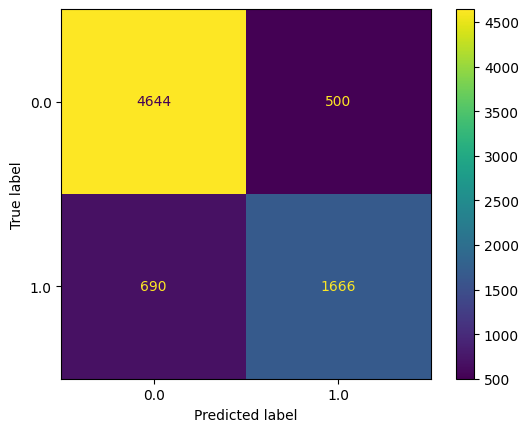

logregTest 

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1723
         1.0       0.78      0.70      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.80      0.81      2500
weighted avg       0.84      0.84      0.84      2500



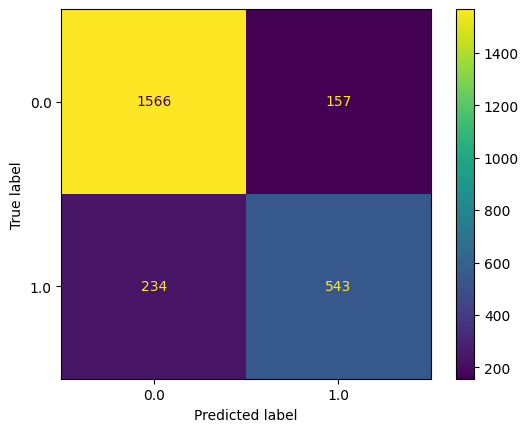

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
logregTrain,0.769160,0.707131,0.736842,0.841333
logregTest,0.775714,0.698842,0.735274,0.843600


In [41]:
# evaluate model
logreg_train_scores = eval_classification(y_train, logreg_train_preds, name='logregTrain')

logreg_test_scores = eval_classification(y_test, logreg_test_preds, name='logregTest')

logreg_scores = pd.concat([logreg_train_scores, logreg_test_scores])
logreg_scores

WITH PCA

In [42]:
pca = PCA(n_components = .95)

In [43]:
# PCA
pca = PCA(n_components = .95)

# create pipeline with Scaler and logistic Regression
PCA_logreg_pipe = make_pipeline(transformer,pca, logreg)

# Fit pipeline
PCA_logreg_pipe.fit(X_train, y_train)

# Get predictions for calculating score
PCA_logreg_train = PCA_logreg_pipe.predict(X_train)
PCA_logreg_test = PCA_logreg_pipe.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


logregPcaTrain 

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      5144
         1.0       0.75      0.68      0.72      2356

    accuracy                           0.83      7500
   macro avg       0.81      0.79      0.80      7500
weighted avg       0.83      0.83      0.83      7500



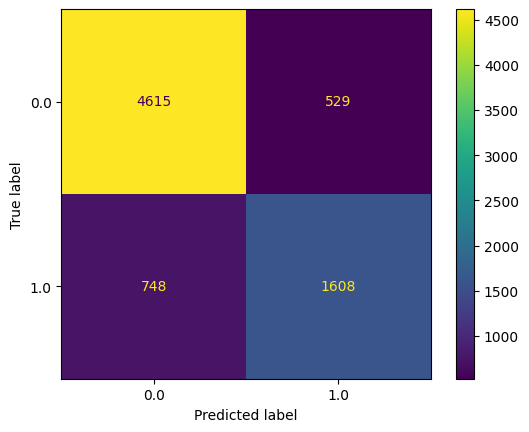

logregPcaTest 

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1723
         1.0       0.76      0.67      0.71       777

    accuracy                           0.83      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.83      0.83      0.83      2500



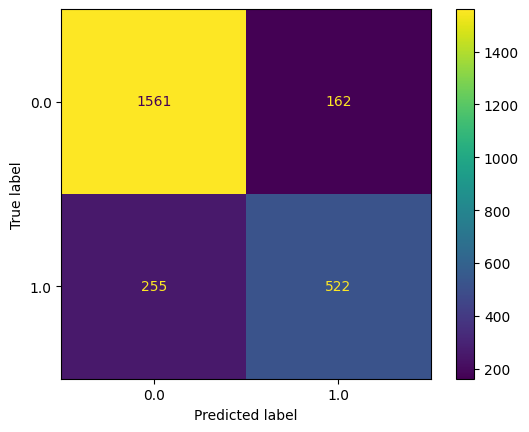

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
logregPcaTrain,0.752457,0.682513,0.715780,0.829733
logregPcaTest,0.763158,0.671815,0.714579,0.833200


In [44]:
# evaluate model
logreg_train_pca_scores = eval_classification(y_train, PCA_logreg_train, name='logregPcaTrain')

logreg_test_pca_scores = eval_classification(y_test, PCA_logreg_test, name='logregPcaTest')

logreg_pca_scores = pd.concat([logreg_train_pca_scores, logreg_test_pca_scores])
logreg_pca_scores

###Tunned Logistic Regestion - GridCV

In [45]:
logreg_liblinear = LogisticRegression(solver='liblinear')
new_logreg_pipe = make_pipeline(transformer, logreg_liblinear)

In [46]:
new_logreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'ANNUAL_MILEAGE',
          'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
         dtype='object')),
                                   ('categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'INCOME', 'VEHICLE_YEAR',
          'VEHICLE_TYPE'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('l

In [47]:
param_grid = {
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [48]:
grid_search = GridSearchCV(new_logreg_pipe, param_grid, n_jobs = -1, verbose = 1)

In [49]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'ANNUAL_MILEAGE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')),
                                                                        ('categorical',
                                                                         OneH...
                                                                                       sparse=False),
                                                                         Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'INCOME', 'VEHICLE_YEAR',
       'VEHICLE_TYPE'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100, 1000],
                         'logisticregression__penalty': ['l1', 'l2']},
             verbose=1)

In [50]:
grid_search.best_params_

{'logisticregression__C': 1000, 'logisticregression__penalty': 'l1'}

In [51]:
# Best logistic Regression model

logreg_best = LogisticRegression(C=100, max_iter=1000, solver='liblinear', penalty='l1')

# create pipeline with Scaler and logistic Regression
logreg_pipe_best = make_pipeline(transformer, logreg_best)

# Fit pipeline
logreg_pipe_best.fit(X_train, y_train)

# Get predictions for calculating score
lr_best_train_preds = logreg_pipe_best.predict(X_train)
lr_best_test_preds = logreg_pipe_best.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


logregGridCVTrain 

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      5144
         1.0       0.77      0.71      0.74      2356

    accuracy                           0.84      7500
   macro avg       0.82      0.80      0.81      7500
weighted avg       0.84      0.84      0.84      7500



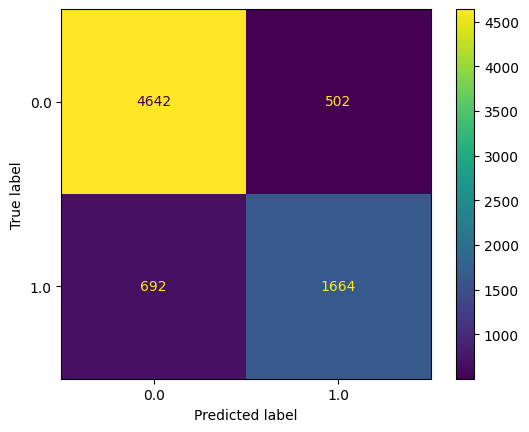

logregGridCVTest 

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1723
         1.0       0.78      0.70      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.80      0.81      2500
weighted avg       0.84      0.84      0.84      2500



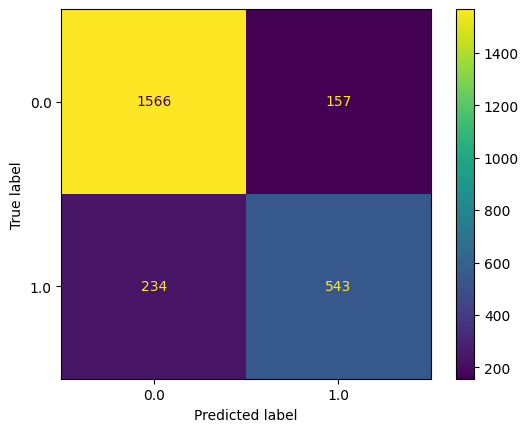

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
logregGridCVTrain,0.768236,0.706282,0.735958,0.8408
logregGridCVTest,0.775714,0.698842,0.735274,0.8436


In [52]:
# evaluate model
logregCV_train_scores = eval_classification(y_train, lr_best_train_preds, name='logregGridCVTrain')

logregCV_test_scores = eval_classification(y_test, lr_best_test_preds, name='logregGridCVTest')

logregCV_scores = pd.concat([logregCV_train_scores, logregCV_test_scores])
logregCV_scores

##K-Nearest Neighbours

###Default model

In [53]:
# default KNN model
knn = KNeighborsClassifier()

# create pipeline with Scaler and logistic Regression
knn_pipe = make_pipeline(transformer, knn)

# Fit pipeline
knn_pipe.fit(X_train, y_train)

# Get predictions for calculating score
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


knnTrain 

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      5144
         1.0       0.80      0.76      0.78      2356

    accuracy                           0.86      7500
   macro avg       0.84      0.84      0.84      7500
weighted avg       0.86      0.86      0.86      7500



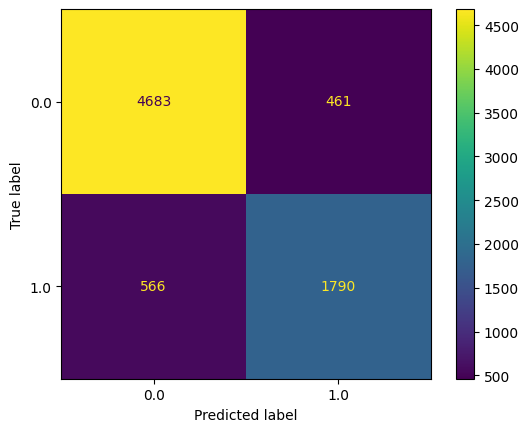

knnTest 

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1723
         1.0       0.70      0.65      0.67       777

    accuracy                           0.81      2500
   macro avg       0.77      0.76      0.77      2500
weighted avg       0.80      0.81      0.80      2500



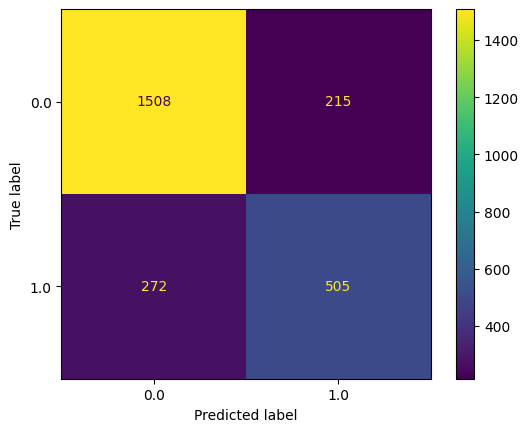

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
knnTrain,0.795202,0.759762,0.777078,0.863067
knnTest,0.701389,0.649936,0.674683,0.805200


In [54]:
# evaluate model
knn_train_scores = eval_classification(y_train, knn_train_preds, name='knnTrain')

knn_test_scores = eval_classification(y_test, knn_test_preds, name='knnTest')

knn_scores = pd.concat([knn_train_scores, knn_test_scores])
knn_scores

###Tunned KNN - GridCV

In [55]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'ANNUAL_MILEAGE',
          'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
         dtype='object')),
                                   ('categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'INCOME', 'VEHICLE_YEAR',
          'VEHICLE_TYPE'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('k

In [56]:
param_grid = {'kneighborsclassifier__n_neighbors': [1, 2, 3, 5, 6, 7, 8, 9, 10]}

In [57]:
grid_search_knn = GridSearchCV(knn_pipe, param_grid, n_jobs = -1, verbose = 1)
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'ANNUAL_MILEAGE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')),
                                                                        ('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'INCOME', 'VEHICLE_YEAR',
       'VEHICLE_TYPE'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 5, 6, 7,
                                                               8, 9, 10]},
             verbose=1)

In [58]:
grid_search_knn.best_params_

{'kneighborsclassifier__n_neighbors': 10}

In [59]:
# Tunned KNN model
knn10 = KNeighborsClassifier(n_neighbors=10)

# create pipeline with Scaler and logistic Regression
knn10_pipe = make_pipeline(transformer, knn10)

# Fit pipeline
knn10_pipe.fit(X_train, y_train)

# Get predictions for calculating score
tunned_knn_train_preds = knn10_pipe.predict(X_train)
tunned_knn_test_preds = knn10_pipe.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


knnCVTrain 

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      5144
         1.0       0.80      0.69      0.74      2356

    accuracy                           0.85      7500
   macro avg       0.83      0.81      0.82      7500
weighted avg       0.85      0.85      0.85      7500



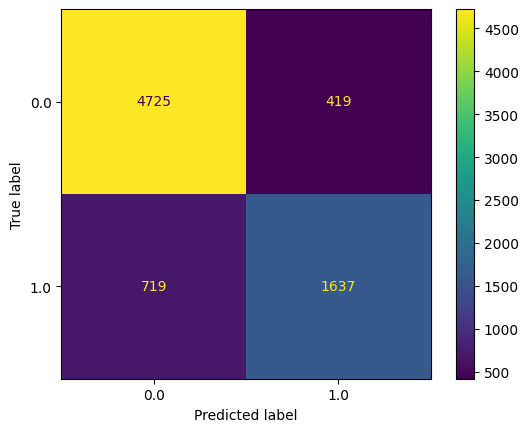

knnCVTest 

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      1723
         1.0       0.75      0.66      0.70       777

    accuracy                           0.83      2500
   macro avg       0.80      0.78      0.79      2500
weighted avg       0.82      0.83      0.82      2500



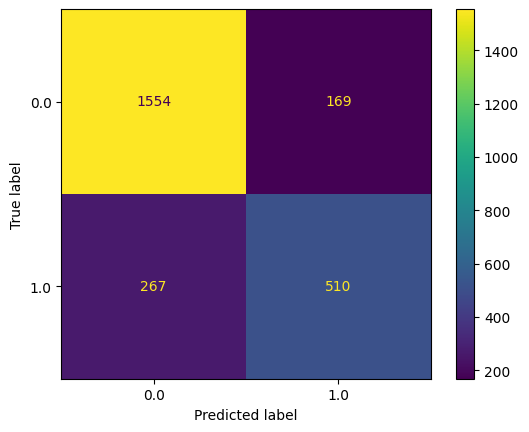

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
knnCVTrain,0.796206,0.694822,0.742067,0.848267
knnCVTest,0.751105,0.656371,0.700549,0.825600


In [60]:
# evaluate model
knnCV_train_scores = eval_classification(y_train, tunned_knn_train_preds, name='knnCVTrain')

knnCV_test_scores = eval_classification(y_test, tunned_knn_test_preds, name='knnCVTest')

knnCV_scores = pd.concat([knnCV_train_scores, knnCV_test_scores])
knnCV_scores

##Random Forest

###Default model

In [61]:
# default RF model
rf = RandomForestClassifier()

# create pipeline with Scaler and logistic Regression
rf_pipe = make_pipeline(transformer, rf)

# Fit pipeline
rf_pipe.fit(X_train, y_train)

# Get predictions for calculating score
rf_train_preds = rf_pipe.predict(X_train)
rf_test_preds = rf_pipe.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


knnCVTrain 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



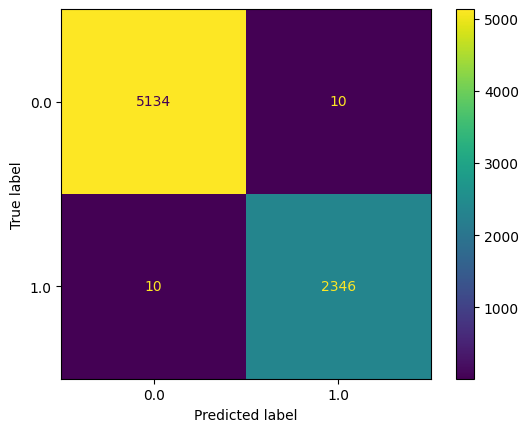

knnCVTest 

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1723
         1.0       0.73      0.66      0.69       777

    accuracy                           0.82      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.82      0.82      0.82      2500



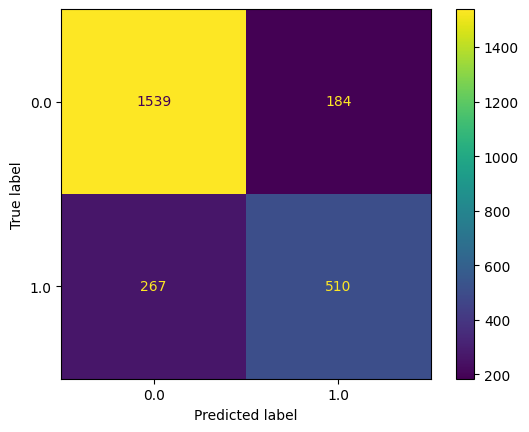

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
knnCVTrain,0.995756,0.995756,0.995756,0.997333
knnCVTest,0.734870,0.656371,0.693406,0.819600


In [62]:
# evaluate model
rf_train_scores = eval_classification(y_train, rf_train_preds, name='knnCVTrain')

rf_test_scores = eval_classification(y_test, rf_test_preds, name='knnCVTest')

rf_scores = pd.concat([rf_train_scores, rf_test_scores])
rf_scores

###Tunned Random Forest - GridCV

In [63]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'ANNUAL_MILEAGE',
          'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
         dtype='object')),
                                   ('categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'INCOME', 'VEHICLE_YEAR',
          'VEHICLE_TYPE'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('r

In [64]:
# Define param grid with options to try
params = {'randomforestclassifier__max_depth': [None,10,15,20],
          'randomforestclassifier__n_estimators':[10,100,150,200],
          'randomforestclassifier__max_features':['sqrt','log2',None],
          'randomforestclassifier__oob_score':[True,False],
          }

In [65]:
# Instantiate the gridsearch
gridsearch_rf = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
gridsearch_rf.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'ANNUAL_MILEAGE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')),
                                                                        ('categorical'...
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 15,
                                                               20],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2',
                                                                  None],
                         'randomforestclassifier__n_estimators': [10, 100, 150,
                                                                  200],
                         'randomforestclassifier__oob_score': [True, False]},
             verbose=1)

In [66]:
gridsearch_rf.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__oob_score': False}

In [67]:
# Tunned RF model
best_rf = RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=150, oob_score=True)

# create pipeline with Scaler and logistic Regression
best_rf_pipe = make_pipeline(transformer, best_rf)

# Fit pipeline
best_rf_pipe.fit(X_train, y_train)

# Get predictions for calculating score
tunned_rf_train_preds = best_rf_pipe.predict(X_train)
tunned_rf_test_preds = best_rf_pipe.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


rfCVTrain 

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      5144
         1.0       0.82      0.77      0.79      2356

    accuracy                           0.87      7500
   macro avg       0.86      0.85      0.85      7500
weighted avg       0.87      0.87      0.87      7500



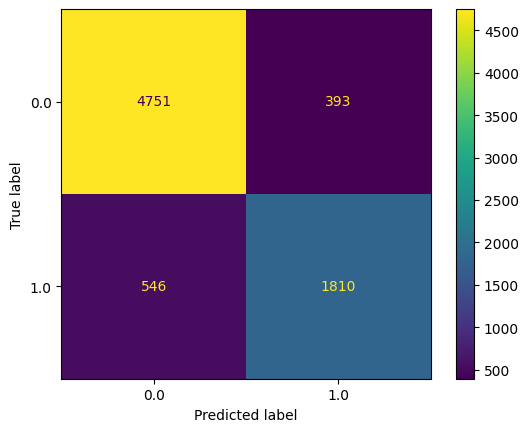

rfCVTest 

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1723
         1.0       0.76      0.68      0.72       777

    accuracy                           0.84      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.83      0.84      0.83      2500



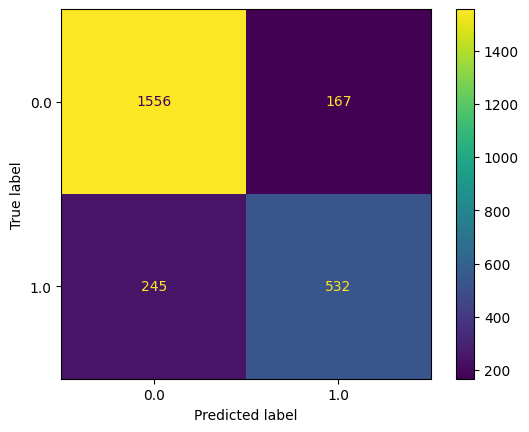

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
rfCVTrain,0.821607,0.768251,0.794034,0.8748
rfCVTest,0.761087,0.684685,0.720867,0.8352


In [68]:
# evaluate model
rfCV_train_scores = eval_classification(y_train, tunned_rf_train_preds, name='rfCVTrain')

rfCV_test_scores = eval_classification(y_test, tunned_rf_test_preds, name='rfCVTest')

rfCV_scores = pd.concat([rfCV_train_scores, rfCV_test_scores])
rfCV_scores

#Production model

My Production model is the Default Logistic Regression model as it performs the best considering the metrics on the test data and closely match the train scores.

Default Logist Regression model:
The model provided the Best:

Accuracy: which indicates the model did the best at perdicting the correct.

F1 score: which also indicates the Reduction in Type 1 and 2 errors which speaks to the Recall and Precision score

- Precision: 0.775714
- Recall: 0.698842
- F1 Score: 0.735274
- Accuracy: 0.843600